In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


In [6]:
# Load CSV file
data = pd.read_csv('AusApparalSales4thQrt2020.csv')

# Display basic info
print("Dataset shape:", data.shape)
data.head()


Dataset shape: (7560, 6)


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [7]:
# Check for missing values
print("Missing values:\n", data.isna().sum())

# Check data types and duplicates
print("\nData types:\n", data.dtypes)
print("\nDuplicate entries:", data.duplicated().sum())

# Drop duplicates if any
data.drop_duplicates(inplace=True)

# Fill or drop missing values
# Example: drop rows with null Sales or Unit
# Harmonize column name for units if needed
if 'Units' in data.columns and 'Unit' not in data.columns:
    data.rename(columns={'Units': 'Unit'}, inplace=True)

data.dropna(subset=['Sales', 'Unit'], inplace=True)

# Reset index
data.reset_index(drop=True, inplace=True)


Missing values:
 Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

Data types:
 Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

Duplicate entries: 0


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Fit on numeric columns and create normalized versions without overwriting originals
scaled = scaler.fit_transform(data[['Sales', 'Unit']])
data['Sales_norm'] = scaled[:, 0]
data['Unit_norm'] = scaled[:, 1]

print("Normalized Data Sample:")
data[['Sales', 'Unit', 'Sales_norm', 'Unit_norm']].head()


Normalized Data Sample:


,Sales,Unit,Sales_norm,Unit_norm
0,20000,8,0.095238,0.095238
1,20000,8,0.095238,0.095238
2,10000,4,0.031746,0.031746
3,37500,15,0.206349,0.206349
4,7500,3,0.015873,0.015873


In [9]:
# Group by State and Customer Group
state_sales = data.groupby('State')['Sales'].sum().sort_values(ascending=False)
# Harmonize customer group column name
group_column = 'Group' if 'Group' in data.columns else 'CustomerGroup'
group_sales = data.groupby(group_column)['Sales'].sum().sort_values(ascending=False)

print("State-wise Sales:\n", state_sales)
print("\nCustomer Group-wise Sales:\n", group_sales)


State-wise Sales:
 State
VIC    105565000
NSW     74970000
SA      58857500
QLD     33417500
TAS     22760000
NT      22580000
WA      22152500
Name: Sales, dtype: int64

Customer Group-wise Sales:
 Group
Men        85750000
Women      85442500
Kids       85072500
Seniors    84037500
Name: Sales, dtype: int64


In [10]:
# Descriptive statistics for Sales and Unit
print("Descriptive Statistics:\n", data[['Sales', 'Unit']].describe())

# Mean, median, mode, std
print("\nMean Sales:", data['Sales'].mean())
print("Median Sales:", data['Sales'].median())
print("Mode Sales:", data['Sales'].mode()[0])
print("Std Dev Sales:", data['Sales'].std())


Descriptive Statistics:
                Sales         Unit
count    7560.000000  7560.000000
mean    45013.558201    18.005423
std     32253.506944    12.901403
min      5000.000000     2.000000
25%     20000.000000     8.000000
50%     35000.000000    14.000000
75%     65000.000000    26.000000
max    162500.000000    65.000000

Mean Sales: 45013.5582010582
Median Sales: 35000.0
Mode Sales: 22500
Std Dev Sales: 32253.506943966317


In [11]:
highest_state = state_sales.idxmax()
lowest_state = state_sales.idxmin()

highest_group = group_sales.idxmax()
lowest_group = group_sales.idxmin()

print(f"Highest Revenue State: {highest_state}")
print(f"Lowest Revenue State: {lowest_state}")
print(f"Highest Revenue Group: {highest_group}")
print(f"Lowest Revenue Group: {lowest_group}")


Highest Revenue State:  VIC
Lowest Revenue State:  WA
Highest Revenue Group:  Men
Lowest Revenue Group:  Seniors


In [12]:
# Convert Date column if present
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    data['Week'] = data['Date'].dt.isocalendar().week
    data['Month'] = data['Date'].dt.month
    data['Quarter'] = data['Date'].dt.quarter

    weekly = data.groupby('Week')['Sales'].sum()
    monthly = data.groupby('Month')['Sales'].sum()
    quarterly = data.groupby('Quarter')['Sales'].sum()

    print("Weekly Summary:\n", weekly)
    print("\nMonthly Summary:\n", monthly)
    print("\nQuarterly Summary:\n", quarterly)
else:
    print("⚠️ No Date column found for time-based analysis.")


Weekly Summary:
 Week
40    15045000
41    27002500
42    26640000
43    26815000
44    21807500
45    20865000
46    21172500
47    21112500
48    21477500
49    29622500
50    31525000
51    31655000
52    31770000
53    13792500
Name: Sales, dtype: int64

Monthly Summary:
 Month
10    114290000
11     90682500
12    135330000
Name: Sales, dtype: int64

Quarterly Summary:
 Quarter
4    340302500
Name: Sales, dtype: int64


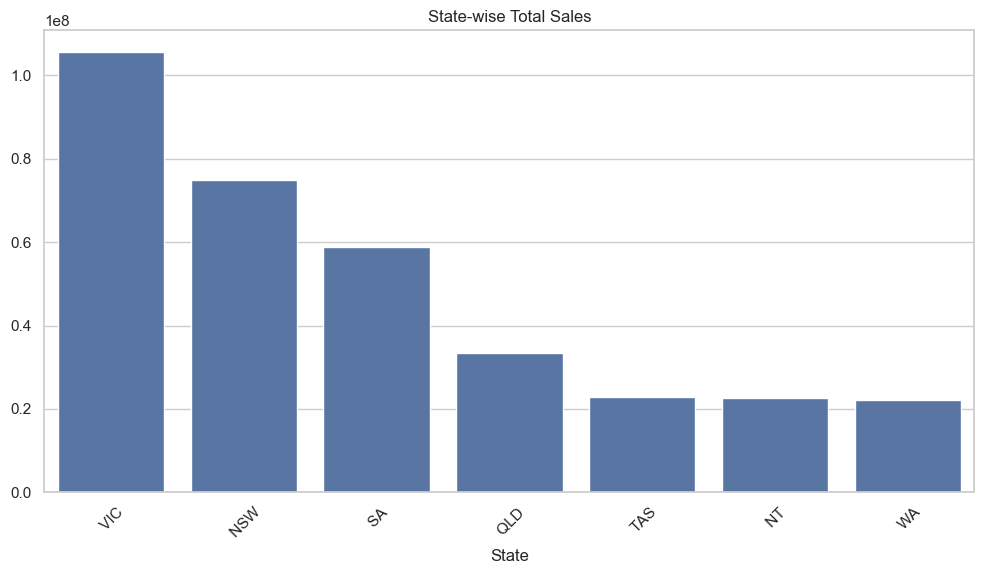

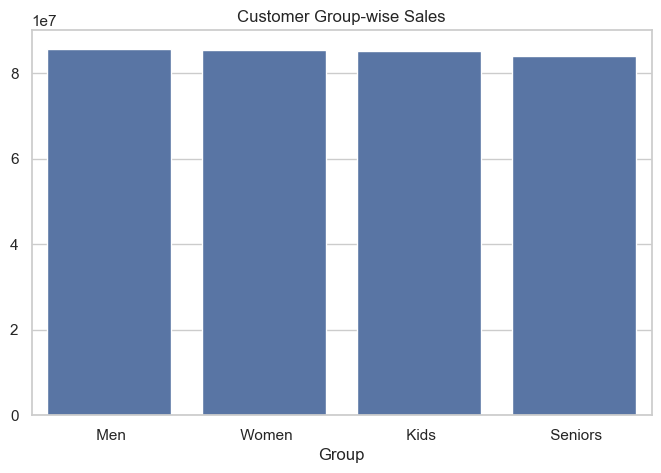

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x=state_sales.index, y=state_sales.values)
plt.title('State-wise Total Sales')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=group_sales.index, y=group_sales.values)
plt.title('Customer Group-wise Sales')
plt.show()


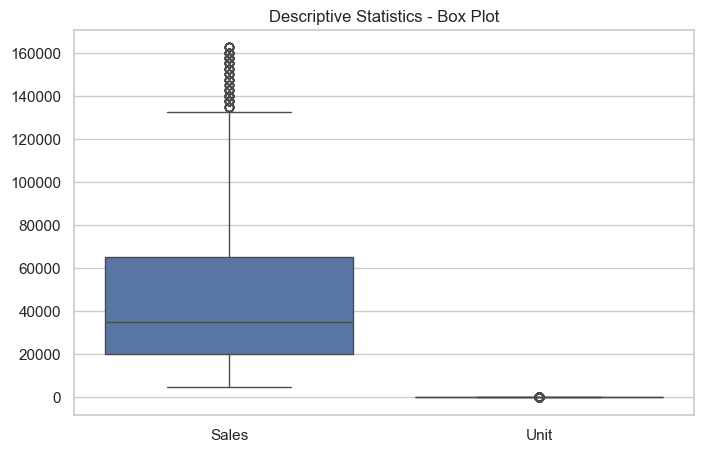

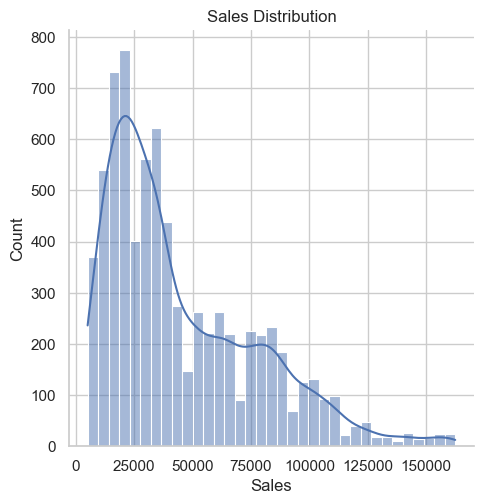

In [14]:
# Box plot for descriptive statistics
plt.figure(figsize=(8,5))
sns.boxplot(data=data[['Sales', 'Unit']])
plt.title('Descriptive Statistics - Box Plot')
plt.show()

# Distribution plot for Sales
sns.displot(data['Sales'], kde=True)
plt.title('Sales Distribution')
plt.show()


C:\Users\rhtgh\AppData\Local\Temp\ipykernel_11724\3616617702.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour'] = pd.to_datetime(data['Time'], errors='coerce').dt.hour


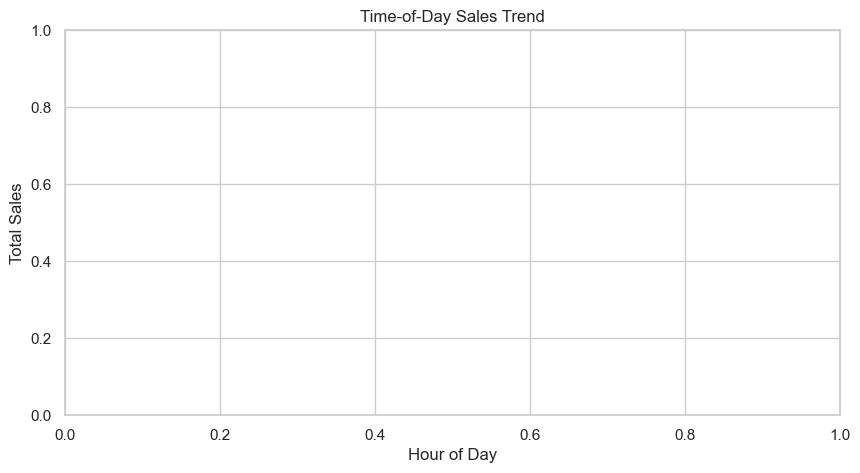

In [15]:
if 'Time' in data.columns:
    # Handle categorical time labels like Morning/Afternoon/Evening/Night
    time_map = {
        'Morning': 9,
        'Afternoon': 15,
        'Evening': 19,
        'Night': 22
    }
    if data['Time'].dtype == 'object' and set(data['Time'].unique()).issubset(set(time_map.keys())):
        data['Hour'] = data['Time'].map(time_map)
    else:
        # Try parsing HH:MM:SS
        data['Hour'] = pd.to_datetime(data['Time'], errors='coerce').dt.hour

    hourly_sales = data.groupby('Hour', dropna=True)['Sales'].sum().sort_index()

    plt.figure(figsize=(10,5))
    sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o')
    plt.title('Time-of-Day Sales Trend')
    plt.xlabel('Hour of Day')
    plt.ylabel('Total Sales')
    plt.show()
else:
    print("⚠️ No Time column found for hourly sales analysis.")


In [16]:
print(f"""
Recommendations:
1. Focus more marketing efforts on low-revenue states like {lowest_state}.
2. Expand successful programs from {highest_state} to weaker regions.
3. Target group "{highest_group}" for future promotions as they generate the highest revenue.
4. Identify peak sales hours from time analysis for personalized offers.
5. Maintain data normalization for consistency in future analysis.
""")



Recommendations:
1. Focus more marketing efforts on low-revenue states like  WA.
2. Expand successful programs from  VIC to weaker regions.
3. Target group " Men" for future promotions as they generate the highest revenue.
4. Identify peak sales hours from time analysis for personalized offers.
5. Maintain data normalization for consistency in future analysis.

